<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Me-in-numbers" data-toc-modified-id="Me-in-numbers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Me in numbers</a></span><ul class="toc-item"><li><span><a href="#Weight-Data" data-toc-modified-id="Weight-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Weight Data</a></span><ul class="toc-item"><li><span><a href="#Reformatting-Columns" data-toc-modified-id="Reformatting-Columns-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Reformatting Columns</a></span></li></ul></li></ul></li></ul></div>

# Me in numbers

In [18]:

from pathlib import Path
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

## Weight Data

In [2]:

data_path = Path().resolve().parent / 'data' / 'me_in_numbers'
weight_data_file = data_path / 'weight' / 'history.csv'
print(f'Path: {data_path} exists: {data_path.exists()}')


Path: /home/luiscberrocal/PycharmProjects/ml_hands_on/data/me_in_numbers exists: True


In [3]:
df = pd.read_csv(weight_data_file)
df.head()

,Weight (lb),Body Fat,Muscle Mass,Water,BMI,Date/Time
0,172.6,19.6%,36%,62.9%,24.1,Jan 10 2018 12:42:52 PM
1,172.8,19.7%,36%,62.8%,24.1,Jan 11 2018 07:13:30 AM
2,173.6,19.8%,35.9%,62.7%,24.2,Jan 12 2018 07:39:54 AM
3,172.2,19.5%,36%,62.9%,24.0,Jan 13 2018 08:02:41 AM
4,172.2,19.5%,36%,62.9%,24.0,Jan 13 2018 08:04:04 AM


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weight (lb)  1270 non-null   float64
 1   Body Fat     1270 non-null   object 
 2   Muscle Mass  1270 non-null   object 
 3   Water        1270 non-null   object 
 4   BMI          1270 non-null   float64
 5   Date/Time    1270 non-null   object 
dtypes: float64(2), object(4)
memory usage: 59.7+ KB


### Reformatting Columns


In [13]:
df['date'] =  pd.to_datetime(df['Date/Time'], format='%b %d %Y %I:%M:%S %p')

In [14]:
start_date = df['date'].min()
end_date = df['date'].max()

print(f'Start: {start_date} End: {end_date}')

Start: 2018-01-10 12:42:52 End: 2022-02-20 09:02:29


In [29]:
def parse_percentage(value):
    regexp = re.compile(r'(?P<num>\d+\.?\d*)%')
    match = regexp.match(value)
    if match:
        float_val = float(match.group('num'))/100.00
        return float_val
    else:
        raise Exception(f'NO MATCH {value}')
        
    
df['body_fat'] = df['Body Fat'].apply(parse_percentage)
df['muscle_mass'] = df['Muscle Mass'].apply(parse_percentage)
df['water'] = df['Water'].apply(parse_percentage)

In [31]:
df.drop(['Body Fat', 'Muscle Mass', 'Water', 'Date/Time'], axis=1)

,Weight (lb),BMI,date,body_fat,muscle_mass,water
0,172.6,24.1,2018-01-10 12:42:52,0.196,0.360,0.629
1,172.8,24.1,2018-01-11 07:13:30,0.197,0.360,0.628
2,173.6,24.2,2018-01-12 07:39:54,0.198,0.359,0.627
3,172.2,24.0,2018-01-13 08:02:41,0.195,0.360,0.629
4,172.2,24.0,2018-01-13 08:04:04,0.195,0.360,0.629
...,...,...,...,...,...,...
1265,159.6,22.3,2022-02-16 14:55:35,0.170,0.365,0.654
1266,160.4,22.4,2022-02-17 05:57:30,0.176,0.362,0.649
1267,159.8,22.3,2022-02-18 06:07:23,0.173,0.363,0.651
1268,159.0,22.2,2022-02-19 06:24:31,0.172,0.364,0.652


In [38]:
df.drop(df[df.body_fat == 0.0].index, inplace=True)

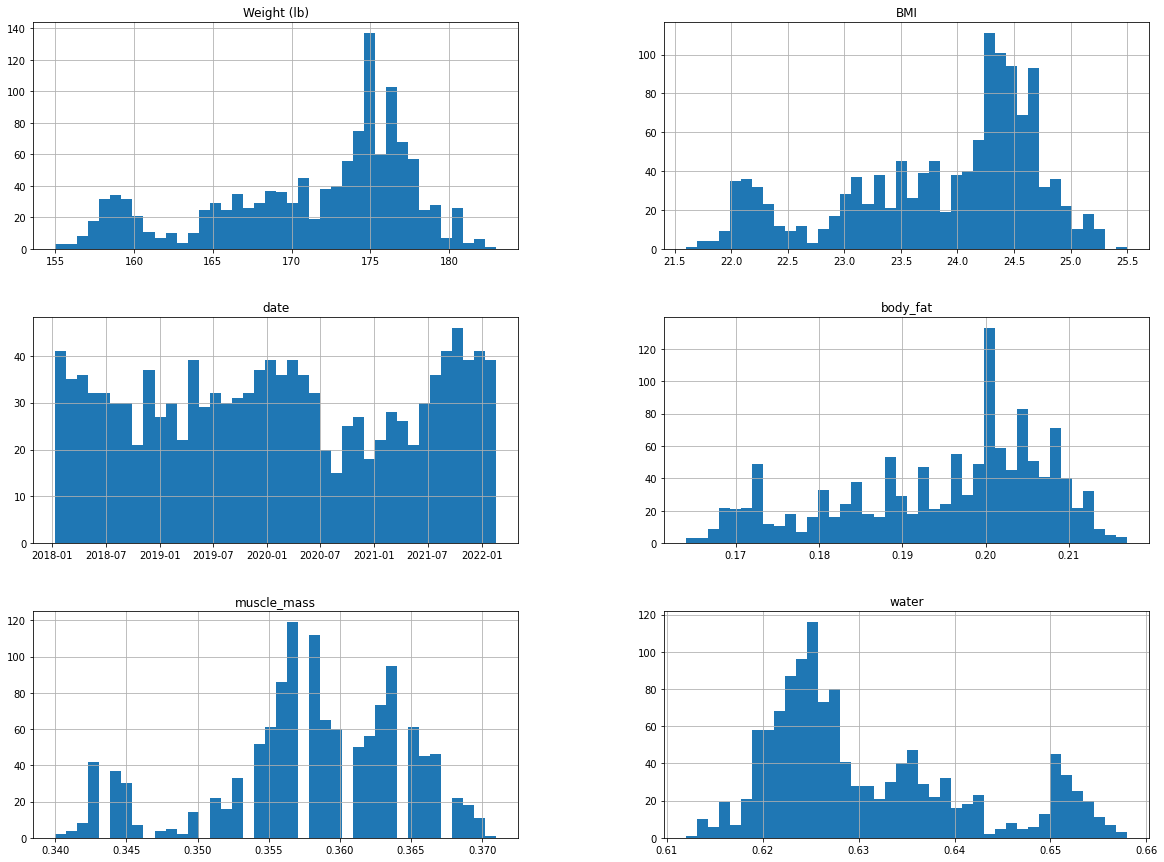

In [39]:
df.hist(bins=40, figsize=(20, 15))
plt.show()

In [40]:
df.describe()

,Weight (lb),BMI,body_fat,muscle_mass,water
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,171.190627,23.870214,0.194878,0.358066,0.630782
std,6.368299,0.887420,0.012556,0.006649,0.010558
min,155.000000,21.600000,0.164000,0.340000,0.612000
25%,167.200000,23.300000,0.186000,0.355000,0.623000
50%,173.600000,24.200000,0.199000,0.358000,0.627000
75%,176.000000,24.500000,0.204000,0.363000,0.637000
max,183.000000,25.500000,0.217000,0.371000,0.658000
